First lets import poloto.

In [12]:
:dep poloto

Next import evcxr rendering for poloto.

In [13]:
:dep poloto-evcxr
use poloto_evcxr::prelude::*;

Now lets make a simple function that just displays one plot to avoid having to write alot of boilerplate.

In [14]:
fn show(it:impl IntoIterator<Item=[f64;2]>){
    let j=poloto::build::plot("a").line(it.into_iter());
    let res=poloto::frame_build().data(j).build_and_label(("hello","x","y"));
    res.append_to(poloto::header().dark_theme()).render_evcxr();
}

Ok now lets plot some data.

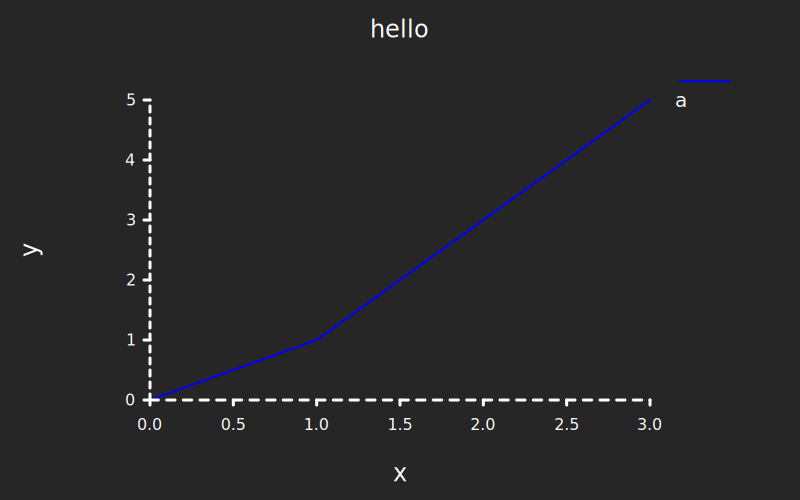

In [15]:
let data=vec!([0.0,0.0],[1.0,1.0],[3.0,5.0]);
show(data);

Ok cool. Now lets change the data.

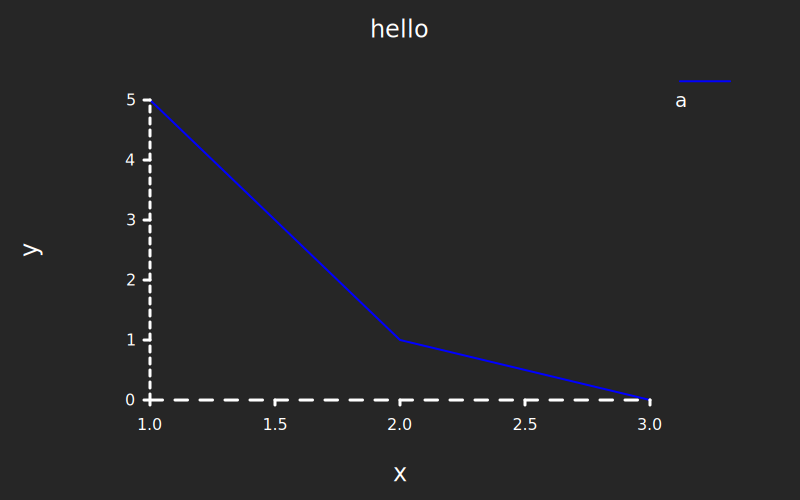

In [16]:
let data=vec!([1.0,5.0],[2.0,1.0],[3.0,0.0]);
show(data);

Oh no now the data is going down!